In [11]:
install.packages('fpp3', dependencies = TRUE)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [12]:
library(fpp3)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.2      ✔ tsibble     1.0.1 
✔ dplyr       1.0.6      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.3      ✔ feasts      0.2.1 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.3      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()



In [14]:
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



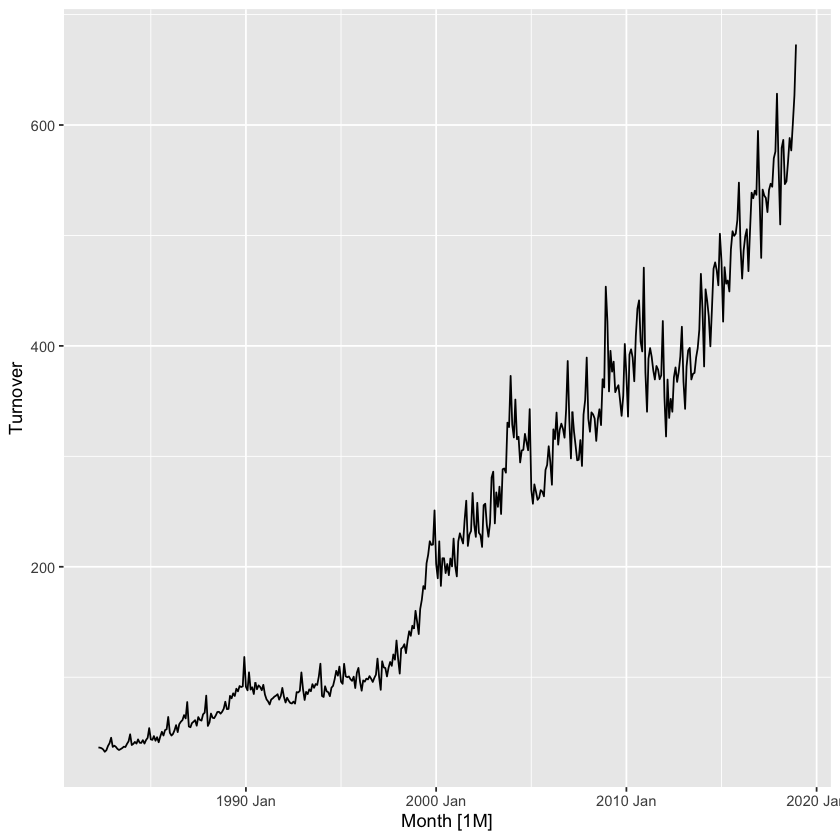

In [15]:
# Plot one time series
aus_retail %>%
  filter(`Series ID`=="A3349640L") %>%
  autoplot(Turnover)

In [16]:
# Produce some forecasts
aus_retail %>%
  filter(`Series ID`=="A3349640L") %>%
  model(ETS(Turnover)) %>%
  forecast(h = "2 years")

State    Industry                                 .model        Month   
1  Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Jan
2  Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Feb
3  Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Mar
4  Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Apr
5  Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 May
6  Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Jun
7  Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Jul
8  Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Aug
9  Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Sep
10 Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Oct
11 Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Nov
12 Victoria Cafes, restaurants and catering services ETS(Turnover) 2019 Dec
13 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Jan
14 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Feb
15 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Mar
16 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Apr
17 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 May
18 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Jun
19 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Jul
20 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Aug
21 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Sep
22 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Oct
23 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Nov
24 Victoria Cafes, restaurants and catering services ETS(Turnover) 2020 Dec
   Turnover      .mean   
1  N(608, 978)   608.0680
2  N(551, 1129)  551.0745
3  N(622, 1856)  621.6172
4  N(609, 2190)  609.3306
5  N(602, 2539)  602.0018
6  N(577, 2704)  576.9750
7  N(607, 3413)  607.4074
8  N(626, 4072)  625.9879
9  N(614, 4358)  614.4748
10 N(624, 4942)  623.6779
11 N(632, 5535)  631.5166
12 N(704, 7460)  703.7229
13 N(631, 6616)  630.8351
14 N(572, 5828)  571.6440
15 N(645, 7920)  644.7486
16 N(632, 8100)  631.9353
17 N(624, 8389)  624.2665
18 N(598, 8153)  598.2492
19 N(630, 9536)  629.7357
20 N(649, 10664) 648.9295
21 N(637, 10796) 636.9266
22 N(646, 11663) 646.3975
23 N(654, 12517) 654.4527
24 N(729, 16244) 729.2052

# 2. Time Series Graphics

## 2.1 Tsibble objects

http://govfinance.byu.edu/govfinance/classes/forecast/lectures/illustrations/time%20series%20graphics/Time-Series-Graphics-I.html

In [17]:
y <- tsibble(
  Year = 2015:2019,
  Observation = c(123, 39, 78, 52, 110),
  index = Year
)

In [18]:
y

Year Observation
1 2015 123        
2 2016  39        
3 2017  78        
4 2018  52        
5 2019 110

In [19]:
## # A tsibble: 5 x 2 [1M]
##      Month Observation
##      <mth>       <dbl>
## 1 2019 Jan          50
## 2 2019 Feb          23
## 3 2019 Mar          34
## 4 2019 Apr          30
## 5 2019 May          25

In [20]:
z <- tibble(Month = c("2019 Jan", "2019 Feb", "2019 Mar", "2019 Apr", "2019 May"),
            Observation = c(50, 23, 34, 30, 25)
)

In [21]:
z %>%
  mutate(Month = yearmonth(Month)) %>%
  as_tsibble(index = Month)

Month    Observation
1 2019 Jan 50         
2 2019 Feb 23         
3 2019 Mar 34         
4 2019 Apr 30         
5 2019 May 25

Frequency	Function

Annual	start:end

Quarterly	yearquarter()

Monthly	yearmonth()

Weekly	yearweek()

Daily	as_date(), ymd()

Sub-daily	as_datetime(), ymd_hms()

In [22]:
olympic_running

Year Length Sex   Time   
1   1896 100    men   12.00  
2   1900 100    men   11.00  
3   1904 100    men   11.00  
4   1908 100    men   10.80  
5   1912 100    men   10.80  
6   1916 100    men      NA  
7   1920 100    men   10.80  
8   1924 100    men   10.60  
9   1928 100    men   10.80  
10  1932 100    men   10.30  
11  1936 100    men   10.30  
12  1940 100    men      NA  
13  1944 100    men      NA  
14  1948 100    men   10.30  
15  1952 100    men   10.40  
16  1956 100    men   10.50  
17  1960 100    men   10.20  
18  1964 100    men   10.00  
19  1968 100    men    9.90  
20  1972 100    men   10.14  
21  1976 100    men   10.06  
22  1980 100    men   10.25  
23  1984 100    men    9.99  
24  1988 100    men    9.92  
25  1992 100    men    9.96  
26  1996 100    men    9.84  
27  2000 100    men    9.87  
28  2004 100    men    9.85  
29  2008 100    men    9.69  
30  2012 100    men    9.63  
⋮   ⋮    ⋮      ⋮     ⋮      
283 1932 10000  men   1811.40
284 1936 10000  men   1815.40
285 1940 10000  men        NA
286 1944 10000  men        NA
287 1948 10000  men   1799.60
288 1952 10000  men   1757.00
289 1956 10000  men   1725.60
290 1960 10000  men   1712.20
291 1964 10000  men   1704.40
292 1968 10000  men   1767.40
293 1972 10000  men   1658.35
294 1976 10000  men   1660.38
295 1980 10000  men   1662.70
296 1984 10000  men   1667.54
297 1988 10000  men   1641.46
298 1992 10000  men   1666.70
299 1996 10000  men   1627.34
300 2000 10000  men   1638.20
301 2004 10000  men   1625.10
302 2008 10000  men   1621.17
303 2012 10000  men   1650.42
304 2016 10000  men   1625.17
305 1988 10000  women 1865.21
306 1992 10000  women 1866.02
307 1996 10000  women 1861.63
308 2000 10000  women 1817.49
309 2004 10000  women 1824.36
310 2008 10000  women 1794.66
311 2012 10000  women 1820.75
312 2016 10000  women 1757.45

In [24]:
olympic_running %>% distinct(Year)

Year
1  1896
2  1900
3  1904
4  1908
5  1912
6  1916
7  1920
8  1924
9  1928
10 1932
11 1936
12 1940
13 1944
14 1948
15 1952
16 1956
17 1960
18 1964
19 1968
20 1972
21 1976
22 1980
23 1984
24 1988
25 1992
26 1996
27 2000
28 2004
29 2008
30 2012
31 2016

In [23]:
olympic_running %>% distinct(Sex)

Sex  
1 men  
2 women

In [22]:
olympic_running %>% distinct(Length)

Length
1   100 
2   200 
3   400 
4   800 
5  1500 
6  5000 
7 10000

In [28]:
PBS # sales data on pharmaceutical products in Australia.
# monthly data on Medicare Australia prescription data
# from July 1991 to June 2008

Month    Concession   Type        ATC1 ATC1_desc                      
1     1991 Jul Concessional Co-payments A    Alimentary tract and metabolism
2     1991 Aug Concessional Co-payments A    Alimentary tract and metabolism
3     1991 Sep Concessional Co-payments A    Alimentary tract and metabolism
4     1991 Oct Concessional Co-payments A    Alimentary tract and metabolism
5     1991 Nov Concessional Co-payments A    Alimentary tract and metabolism
6     1991 Dec Concessional Co-payments A    Alimentary tract and metabolism
7     1992 Jan Concessional Co-payments A    Alimentary tract and metabolism
8     1992 Feb Concessional Co-payments A    Alimentary tract and metabolism
9     1992 Mar Concessional Co-payments A    Alimentary tract and metabolism
10    1992 Apr Concessional Co-payments A    Alimentary tract and metabolism
11    1992 May Concessional Co-payments A    Alimentary tract and metabolism
12    1992 Jun Concessional Co-payments A    Alimentary tract and metabolism
13    1992 Jul Concessional Co-payments A    Alimentary tract and metabolism
14    1992 Aug Concessional Co-payments A    Alimentary tract and metabolism
15    1992 Sep Concessional Co-payments A    Alimentary tract and metabolism
16    1992 Oct Concessional Co-payments A    Alimentary tract and metabolism
17    1992 Nov Concessional Co-payments A    Alimentary tract and metabolism
18    1992 Dec Concessional Co-payments A    Alimentary tract and metabolism
19    1993 Jan Concessional Co-payments A    Alimentary tract and metabolism
20    1993 Feb Concessional Co-payments A    Alimentary tract and metabolism
21    1993 Mar Concessional Co-payments A    Alimentary tract and metabolism
22    1993 Apr Concessional Co-payments A    Alimentary tract and metabolism
23    1993 May Concessional Co-payments A    Alimentary tract and metabolism
24    1993 Jun Concessional Co-payments A    Alimentary tract and metabolism
25    1993 Jul Concessional Co-payments A    Alimentary tract and metabolism
26    1993 Aug Concessional Co-payments A    Alimentary tract and metabolism
27    1993 Sep Concessional Co-payments A    Alimentary tract and metabolism
28    1993 Oct Concessional Co-payments A    Alimentary tract and metabolism
29    1993 Nov Concessional Co-payments A    Alimentary tract and metabolism
30    1993 Dec Concessional Co-payments A    Alimentary tract and metabolism
⋮     ⋮        ⋮            ⋮           ⋮    ⋮                              
67567 2006 Jan General      Safety net  Z    NA                             
67568 2006 Feb General      Safety net  Z    NA                             
67569 2006 Mar General      Safety net  Z    NA                             
67570 2006 Apr General      Safety net  Z    NA                             
67571 2006 May General      Safety net  Z    NA                             
67572 2006 Jun General      Safety net  Z    NA                             
67573 2006 Jul General      Safety net  Z    NA                             
67574 2006 Aug General      Safety net  Z    NA                             
67575 2006 Sep General      Safety net  Z    NA                             
67576 2006 Oct General      Safety net  Z    NA                             
67577 2006 Nov General      Safety net  Z    NA                             
67578 2006 Dec General      Safety net  Z    NA                             
67579 2007 Jan General      Safety net  Z    NA                             
67580 2007 Feb General      Safety net  Z    NA                             
67581 2007 Mar General      Safety net  Z    NA                             
67582 2007 Apr General      Safety net  Z    NA                             
67583 2007 May General      Safety net  Z    NA                             
67584 2007 Jun General      Safety net  Z    NA                             
67585 2007 Jul General      Safety net  Z    NA                             
67586 2007 Aug General      Safety net  Z    NA                             
67

In [27]:
PBS %>%
  filter(ATC2 == "A10")

Month    Concession   Type        ATC1 ATC1_desc                       ATC2
1   1991 Jul Concessional Co-payments A    Alimentary tract and metabolism A10 
2   1991 Aug Concessional Co-payments A    Alimentary tract and metabolism A10 
3   1991 Sep Concessional Co-payments A    Alimentary tract and metabolism A10 
4   1991 Oct Concessional Co-payments A    Alimentary tract and metabolism A10 
5   1991 Nov Concessional Co-payments A    Alimentary tract and metabolism A10 
6   1991 Dec Concessional Co-payments A    Alimentary tract and metabolism A10 
7   1992 Jan Concessional Co-payments A    Alimentary tract and metabolism A10 
8   1992 Feb Concessional Co-payments A    Alimentary tract and metabolism A10 
9   1992 Mar Concessional Co-payments A    Alimentary tract and metabolism A10 
10  1992 Apr Concessional Co-payments A    Alimentary tract and metabolism A10 
11  1992 May Concessional Co-payments A    Alimentary tract and metabolism A10 
12  1992 Jun Concessional Co-payments A    Alimentary tract and metabolism A10 
13  1992 Jul Concessional Co-payments A    Alimentary tract and metabolism A10 
14  1992 Aug Concessional Co-payments A    Alimentary tract and metabolism A10 
15  1992 Sep Concessional Co-payments A    Alimentary tract and metabolism A10 
16  1992 Oct Concessional Co-payments A    Alimentary tract and metabolism A10 
17  1992 Nov Concessional Co-payments A    Alimentary tract and metabolism A10 
18  1992 Dec Concessional Co-payments A    Alimentary tract and metabolism A10 
19  1993 Jan Concessional Co-payments A    Alimentary tract and metabolism A10 
20  1993 Feb Concessional Co-payments A    Alimentary tract and metabolism A10 
21  1993 Mar Concessional Co-payments A    Alimentary tract and metabolism A10 
22  1993 Apr Concessional Co-payments A    Alimentary tract and metabolism A10 
23  1993 May Concessional Co-payments A    Alimentary tract and metabolism A10 
24  1993 Jun Concessional Co-payments A    Alimentary tract and metabolism A10 
25  1993 Jul Concessional Co-payments A    Alimentary tract and metabolism A10 
26  1993 Aug Concessional Co-payments A    Alimentary tract and metabolism A10 
27  1993 Sep Concessional Co-payments A    Alimentary tract and metabolism A10 
28  1993 Oct Concessional Co-payments A    Alimentary tract and metabolism A10 
29  1993 Nov Concessional Co-payments A    Alimentary tract and metabolism A10 
30  1993 Dec Concessional Co-payments A    Alimentary tract and metabolism A10 
⋮   ⋮        ⋮            ⋮           ⋮    ⋮                               ⋮   
787 2006 Jan General      Safety net  A    Alimentary tract and metabolism A10 
788 2006 Feb General      Safety net  A    Alimentary tract and metabolism A10 
789 2006 Mar General      Safety net  A    Alimentary tract and metabolism A10 
790 2006 Apr General      Safety net  A    Alimentary tract and metabolism A10 
791 2006 May General      Safety net  A    Alimentary tract and metabolism A10 
792 2006 Jun General      Safety net  A    Alimentary tract and metabolism A10 
793 2006 Jul General      Safety net  A    Alimentary tract and metabolism A10 
794 2006 Aug General      Safety net  A    Alimentary tract and metabolism A10 
795 2006 Sep General      Safety net  A    Alimentary tract and metabolism A10 
796 2006 Oct General      Safety net  A    Alimentary tract and metabolism A10 
797 2006 Nov General      Safety net  A    Alimentary tract and metabolism A10 
798 2006 Dec General      Safety net  A    Alimentary tract and metabolism A10 
799 2007 Jan General      Safety net  A    Alimentary tract and metabolism A10 
800 2007 Feb General      Safety net  A    Alimentary tract and metabolism A10 
801 2007 Mar General      Safety net  A    Alimentary tract and metabolism A10 
802 2007 Apr General      Safety net  A    Alimentary tract and metabolism A10 
803 2007 May General      Safety net  A    Alimentary tract and metabolism A10 
804 2007 Jun General      Safety net  A    Alimentary tract and metabolism A10 
805 

In [29]:
PBS %>%
  filter(ATC2 == "A10") %>%
  select(Month, Concession, Type, Cost)
# filter() allows us to keep particular rows.
# select() allows us to select particular columns

Month    Concession   Type        Cost   
1   1991 Jul Concessional Co-payments 2092878
2   1991 Aug Concessional Co-payments 1795733
3   1991 Sep Concessional Co-payments 1777231
4   1991 Oct Concessional Co-payments 1848507
5   1991 Nov Concessional Co-payments 1686458
6   1991 Dec Concessional Co-payments 1843079
7   1992 Jan Concessional Co-payments 1564702
8   1992 Feb Concessional Co-payments 1732508
9   1992 Mar Concessional Co-payments 2046102
10  1992 Apr Concessional Co-payments 2225977
11  1992 May Concessional Co-payments 2120129
12  1992 Jun Concessional Co-payments 2168877
13  1992 Jul Concessional Co-payments 2358835
14  1992 Aug Concessional Co-payments 2089832
15  1992 Sep Concessional Co-payments 2025903
16  1992 Oct Concessional Co-payments 1884078
17  1992 Nov Concessional Co-payments 1894137
18  1992 Dec Concessional Co-payments 2078858
19  1993 Jan Concessional Co-payments 1693445
20  1993 Feb Concessional Co-payments 2110917
21  1993 Mar Concessional Co-payments 2657438
22  1993 Apr Concessional Co-payments 2611600
23  1993 May Concessional Co-payments 2721203
24  1993 Jun Concessional Co-payments 2722008
25  1993 Jul Concessional Co-payments 2747617
26  1993 Aug Concessional Co-payments 2695899
27  1993 Sep Concessional Co-payments 2479366
28  1993 Oct Concessional Co-payments 2289673
29  1993 Nov Concessional Co-payments 2204350
30  1993 Dec Concessional Co-payments 2548442
⋮   ⋮        ⋮            ⋮           ⋮      
787 2006 Jan General      Safety net  3565841
788 2006 Feb General      Safety net   140828
789 2006 Mar General      Safety net    19720
790 2006 Apr General      Safety net    22332
791 2006 May General      Safety net    95017
792 2006 Jun General      Safety net   249559
793 2006 Jul General      Safety net   501903
794 2006 Aug General      Safety net   900738
795 2006 Sep General      Safety net  1113671
796 2006 Oct General      Safety net  1804285
797 2006 Nov General      Safety net  2333682
798 2006 Dec General      Safety net  2757536
799 2007 Jan General      Safety net  3943009
800 2007 Feb General      Safety net   196375
801 2007 Mar General      Safety net    34312
802 2007 Apr General      Safety net    15609
803 2007 May General      Safety net    91152
804 2007 Jun General      Safety net   266425
805 2007 Jul General      Safety net   566913
806 2007 Aug General      Safety net  1128281
807 2007 Sep General      Safety net  1502037
808 2007 Oct General      Safety net  1925344
809 2007 Nov General      Safety net  2586139
810 2007 Dec General      Safety net  3204775
811 2008 Jan General      Safety net  4458929
812 2008 Feb General      Safety net   530709
813 2008 Mar General      Safety net    51773
814 2008 Apr General      Safety net    36289
815 2008 May General      Safety net   101233
816 2008 Jun General      Safety net   193179

In [29]:
PBS %>%
  filter(ATC2 == "A10") %>%
  select(Month, Concession, Type, Cost) %>%
  summarise(TotalC = sum(Cost))
# summarise()  allows us to combine data across keys. 
# The new variable TotalC is the sum of all Cost values for each month.

Month    TotalC  
1   1991 Jul 3526591 
2   1991 Aug 3180891 
3   1991 Sep 3252221 
4   1991 Oct 3611003 
5   1991 Nov 3565869 
6   1991 Dec 4306371 
7   1992 Jan 5088335 
8   1992 Feb 2814520 
9   1992 Mar 2985811 
10  1992 Apr 3204780 
11  1992 May 3127578 
12  1992 Jun 3270523 
13  1992 Jul 3737851 
14  1992 Aug 3558776 
15  1992 Sep 3777202 
16  1992 Oct 3924490 
17  1992 Nov 4386531 
18  1992 Dec 5810549 
19  1993 Jan 6192068 
20  1993 Feb 3450857 
21  1993 Mar 3772307 
22  1993 Apr 3734303 
23  1993 May 3905399 
24  1993 Jun 4049687 
25  1993 Jul 4315566 
26  1993 Aug 4562185 
27  1993 Sep 4608662 
28  1993 Oct 4667851 
29  1993 Nov 5093841 
30  1993 Dec 7179962 
⋮   ⋮        ⋮       
175 2006 Jan 23486694
176 2006 Feb 12536987
177 2006 Mar 15467018
178 2006 Apr 14233539
179 2006 May 17783058
180 2006 Jun 16291602
181 2006 Jul 16980282
182 2006 Aug 18612189
183 2006 Sep 16623343
184 2006 Oct 21430241
185 2006 Nov 23575517
186 2006 Dec 23334206
187 2007 Jan 28038383
188 2007 Feb 16763869
189 2007 Mar 19792754
190 2007 Apr 16427305
191 2007 May 21000742
192 2007 Jun 20681002
193 2007 Jul 21834890
194 2007 Aug 23930204
195 2007 Sep 22930357
196 2007 Oct 23263340
197 2007 Nov 25250030
198 2007 Dec 25806090
199 2008 Jan 29665356
200 2008 Feb 21654285
201 2008 Mar 18264945
202 2008 Apr 23107677
203 2008 May 22912510
204 2008 Jun 19431740

In [30]:
PBS %>%
  filter(ATC2 == "A10") %>%
  select(Month, Concession, Type, Cost) %>%
  summarise(TotalC = sum(Cost)) %>%
  mutate(Cost = TotalC/1e6)


Month    TotalC   Cost    
1   1991 Jul 3526591  3.526591
2   1991 Aug 3180891  3.180891
3   1991 Sep 3252221  3.252221
4   1991 Oct 3611003  3.611003
5   1991 Nov 3565869  3.565869
6   1991 Dec 4306371  4.306371
7   1992 Jan 5088335  5.088335
8   1992 Feb 2814520  2.814520
9   1992 Mar 2985811  2.985811
10  1992 Apr 3204780  3.204780
11  1992 May 3127578  3.127578
12  1992 Jun 3270523  3.270523
13  1992 Jul 3737851  3.737851
14  1992 Aug 3558776  3.558776
15  1992 Sep 3777202  3.777202
16  1992 Oct 3924490  3.924490
17  1992 Nov 4386531  4.386531
18  1992 Dec 5810549  5.810549
19  1993 Jan 6192068  6.192068
20  1993 Feb 3450857  3.450857
21  1993 Mar 3772307  3.772307
22  1993 Apr 3734303  3.734303
23  1993 May 3905399  3.905399
24  1993 Jun 4049687  4.049687
25  1993 Jul 4315566  4.315566
26  1993 Aug 4562185  4.562185
27  1993 Sep 4608662  4.608662
28  1993 Oct 4667851  4.667851
29  1993 Nov 5093841  5.093841
30  1993 Dec 7179962  7.179962
⋮   ⋮        ⋮        ⋮       
175 2006 Jan 23486694 23.48669
176 2006 Feb 12536987 12.53699
177 2006 Mar 15467018 15.46702
178 2006 Apr 14233539 14.23354
179 2006 May 17783058 17.78306
180 2006 Jun 16291602 16.29160
181 2006 Jul 16980282 16.98028
182 2006 Aug 18612189 18.61219
183 2006 Sep 16623343 16.62334
184 2006 Oct 21430241 21.43024
185 2006 Nov 23575517 23.57552
186 2006 Dec 23334206 23.33421
187 2007 Jan 28038383 28.03838
188 2007 Feb 16763869 16.76387
189 2007 Mar 19792754 19.79275
190 2007 Apr 16427305 16.42731
191 2007 May 21000742 21.00074
192 2007 Jun 20681002 20.68100
193 2007 Jul 21834890 21.83489
194 2007 Aug 23930204 23.93020
195 2007 Sep 22930357 22.93036
196 2007 Oct 23263340 23.26334
197 2007 Nov 25250030 25.25003
198 2007 Dec 25806090 25.80609
199 2008 Jan 29665356 29.66536
200 2008 Feb 21654285 21.65429
201 2008 Mar 18264945 18.26495
202 2008 Apr 23107677 23.10768
203 2008 May 22912510 22.91251
204 2008 Jun 19431740 19.43174

In [34]:
PBS %>%
  filter(ATC2 == "A10") %>%
  select(Month, Concession, Type, Cost) %>%
  summarise(TotalC = sum(Cost)) %>%
  mutate(Cost = TotalC / 1e6) -> a10

In [35]:
a10

Month    TotalC   Cost    
1   1991 Jul 3526591  3.526591
2   1991 Aug 3180891  3.180891
3   1991 Sep 3252221  3.252221
4   1991 Oct 3611003  3.611003
5   1991 Nov 3565869  3.565869
6   1991 Dec 4306371  4.306371
7   1992 Jan 5088335  5.088335
8   1992 Feb 2814520  2.814520
9   1992 Mar 2985811  2.985811
10  1992 Apr 3204780  3.204780
11  1992 May 3127578  3.127578
12  1992 Jun 3270523  3.270523
13  1992 Jul 3737851  3.737851
14  1992 Aug 3558776  3.558776
15  1992 Sep 3777202  3.777202
16  1992 Oct 3924490  3.924490
17  1992 Nov 4386531  4.386531
18  1992 Dec 5810549  5.810549
19  1993 Jan 6192068  6.192068
20  1993 Feb 3450857  3.450857
21  1993 Mar 3772307  3.772307
22  1993 Apr 3734303  3.734303
23  1993 May 3905399  3.905399
24  1993 Jun 4049687  4.049687
25  1993 Jul 4315566  4.315566
26  1993 Aug 4562185  4.562185
27  1993 Sep 4608662  4.608662
28  1993 Oct 4667851  4.667851
29  1993 Nov 5093841  5.093841
30  1993 Dec 7179962  7.179962
⋮   ⋮        ⋮        ⋮       
175 2006 Jan 23486694 23.48669
176 2006 Feb 12536987 12.53699
177 2006 Mar 15467018 15.46702
178 2006 Apr 14233539 14.23354
179 2006 May 17783058 17.78306
180 2006 Jun 16291602 16.29160
181 2006 Jul 16980282 16.98028
182 2006 Aug 18612189 18.61219
183 2006 Sep 16623343 16.62334
184 2006 Oct 21430241 21.43024
185 2006 Nov 23575517 23.57552
186 2006 Dec 23334206 23.33421
187 2007 Jan 28038383 28.03838
188 2007 Feb 16763869 16.76387
189 2007 Mar 19792754 19.79275
190 2007 Apr 16427305 16.42731
191 2007 May 21000742 21.00074
192 2007 Jun 20681002 20.68100
193 2007 Jul 21834890 21.83489
194 2007 Aug 23930204 23.93020
195 2007 Sep 22930357 22.93036
196 2007 Oct 23263340 23.26334
197 2007 Nov 25250030 25.25003
198 2007 Dec 25806090 25.80609
199 2008 Jan 29665356 29.66536
200 2008 Feb 21654285 21.65429
201 2008 Mar 18264945 18.26495
202 2008 Apr 23107677 23.10768
203 2008 May 22912510 22.91251
204 2008 Jun 19431740 19.43174

In [33]:
prison <- readr::read_csv("https://OTexts.com/fpp3/extrafiles/prison_population.csv")
prison <- prison %>%
  mutate(Quarter = yearquarter(Date)) %>%
  select(-Date) %>%
  as_tsibble(key = c(State, Gender, Legal, Indigenous),
             index = Quarter)

prison


── Column specification ────────────────────────────────────────────────────────
cols(
  Date = col_date(format = ""),
  State = col_character(),
  Gender = col_character(),
  Legal = col_character(),
  Indigenous = col_character(),
  Count = col_double()
)




State Gender Legal     Indigenous Count Quarter
1    ACT   Female Remanded  ATSI       0     2005 Q1
2    ACT   Female Remanded  ATSI       1     2005 Q2
3    ACT   Female Remanded  ATSI       0     2005 Q3
4    ACT   Female Remanded  ATSI       0     2005 Q4
5    ACT   Female Remanded  ATSI       1     2006 Q1
6    ACT   Female Remanded  ATSI       1     2006 Q2
7    ACT   Female Remanded  ATSI       1     2006 Q3
8    ACT   Female Remanded  ATSI       0     2006 Q4
9    ACT   Female Remanded  ATSI       0     2007 Q1
10   ACT   Female Remanded  ATSI       1     2007 Q2
11   ACT   Female Remanded  ATSI       1     2007 Q3
12   ACT   Female Remanded  ATSI       1     2007 Q4
13   ACT   Female Remanded  ATSI       2     2008 Q1
14   ACT   Female Remanded  ATSI       2     2008 Q2
15   ACT   Female Remanded  ATSI       3     2008 Q3
16   ACT   Female Remanded  ATSI       2     2008 Q4
17   ACT   Female Remanded  ATSI       2     2009 Q1
18   ACT   Female Remanded  ATSI       3     2009 Q2
19   ACT   Female Remanded  ATSI       0     2009 Q3
20   ACT   Female Remanded  ATSI       1     2009 Q4
21   ACT   Female Remanded  ATSI       2     2010 Q1
22   ACT   Female Remanded  ATSI       1     2010 Q2
23   ACT   Female Remanded  ATSI       1     2010 Q3
24   ACT   Female Remanded  ATSI       1     2010 Q4
25   ACT   Female Remanded  ATSI       2     2011 Q1
26   ACT   Female Remanded  ATSI       1     2011 Q2
27   ACT   Female Remanded  ATSI       2     2011 Q3
28   ACT   Female Remanded  ATSI       1     2011 Q4
29   ACT   Female Remanded  ATSI       1     2012 Q1
30   ACT   Female Remanded  ATSI       0     2012 Q2
⋮    ⋮     ⋮      ⋮         ⋮          ⋮     ⋮      
3043 WA    Male   Sentenced Non-ATSI   2118  2009 Q3
3044 WA    Male   Sentenced Non-ATSI   2232  2009 Q4
3045 WA    Male   Sentenced Non-ATSI   2290  2010 Q1
3046 WA    Male   Sentenced Non-ATSI   2257  2010 Q2
3047 WA    Male   Sentenced Non-ATSI   2248  2010 Q3
3048 WA    Male   Sentenced Non-ATSI   2190  2010 Q4
3049 WA    Male   Sentenced Non-ATSI   2177  2011 Q1
3050 WA    Male   Sentenced Non-ATSI   2224  2011 Q2
3051 WA    Male   Sentenced Non-ATSI   2228  2011 Q3
3052 WA    Male   Sentenced Non-ATSI   2243  2011 Q4
3053 WA    Male   Sentenced Non-ATSI   2254  2012 Q1
3054 WA    Male   Sentenced Non-ATSI   2281  2012 Q2
3055 WA    Male   Sentenced Non-ATSI   2252  2012 Q3
3056 WA    Male   Sentenced Non-ATSI   2209  2012 Q4
3057 WA    Male   Sentenced Non-ATSI   2218  2013 Q1
3058 WA    Male   Sentenced Non-ATSI   2204  2013 Q2
3059 WA    Male   Sentenced Non-ATSI   2213  2013 Q3
3060 WA    Male   Sentenced Non-ATSI   2216  2013 Q4
3061 WA    Male   Sentenced Non-ATSI   2259  2014 Q1
3062 WA    Male   Sentenced Non-ATSI   2285  2014 Q2
3063 WA    Male   Sentenced Non-ATSI   2322  2014 Q3
3064 WA    Male   Sentenced Non-ATSI   2358  2014 Q4
3065 WA    Male   Sentenced Non-ATSI   2391  2015 Q1
3066 WA    Male   Sentenced Non-ATSI   2418  2015 Q2
3067 WA    Male   Sentenced Non-ATSI   2456  2015 Q3
3068 WA    Male   Sentenced Non-ATSI   2503  2015 Q4
3069 WA    Male   Sentenced Non-ATSI   2488  2016 Q1
3070 WA    Male   Sentenced Non-ATSI   2539  2016 Q2
3071 WA    Male   Sentenced Non-ATSI   2608  2016 Q3
3072 WA    Male   Sentenced Non-ATSI   2625  2016 Q4

## 2.2 Time plots

In [44]:
ansett[1:5,] 

Week     Airports Class    Passengers
1 1989 W28 ADL-PER  Business 193       
2 1989 W29 ADL-PER  Business 254       
3 1989 W30 ADL-PER  Business 185       
4 1989 W31 ADL-PER  Business 254       
5 1989 W32 ADL-PER  Business 191

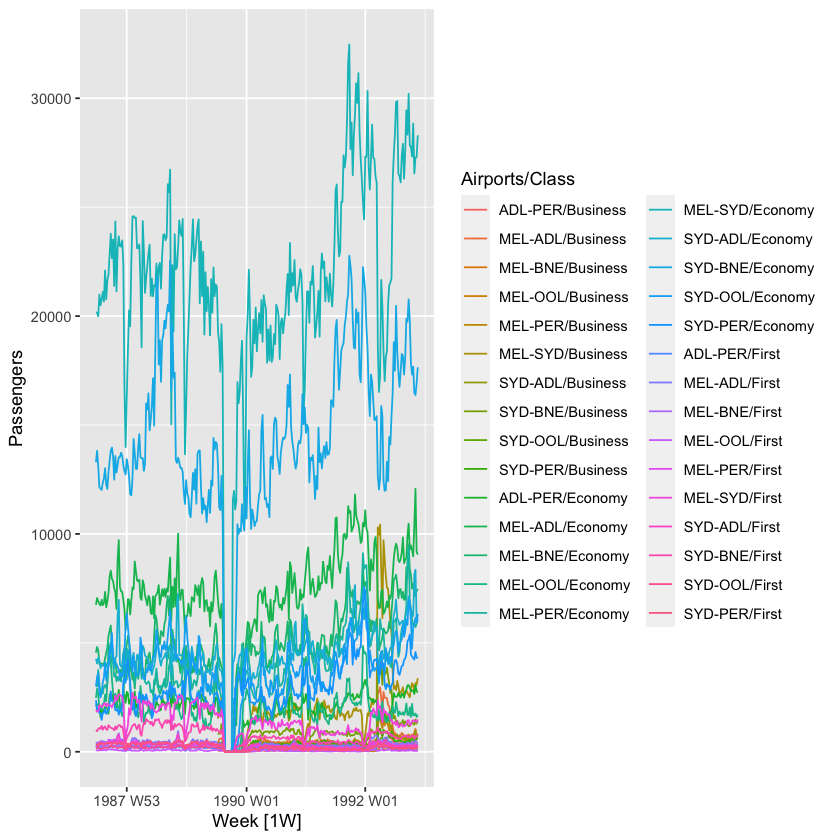

In [47]:
autoplot(ansett, Passengers)

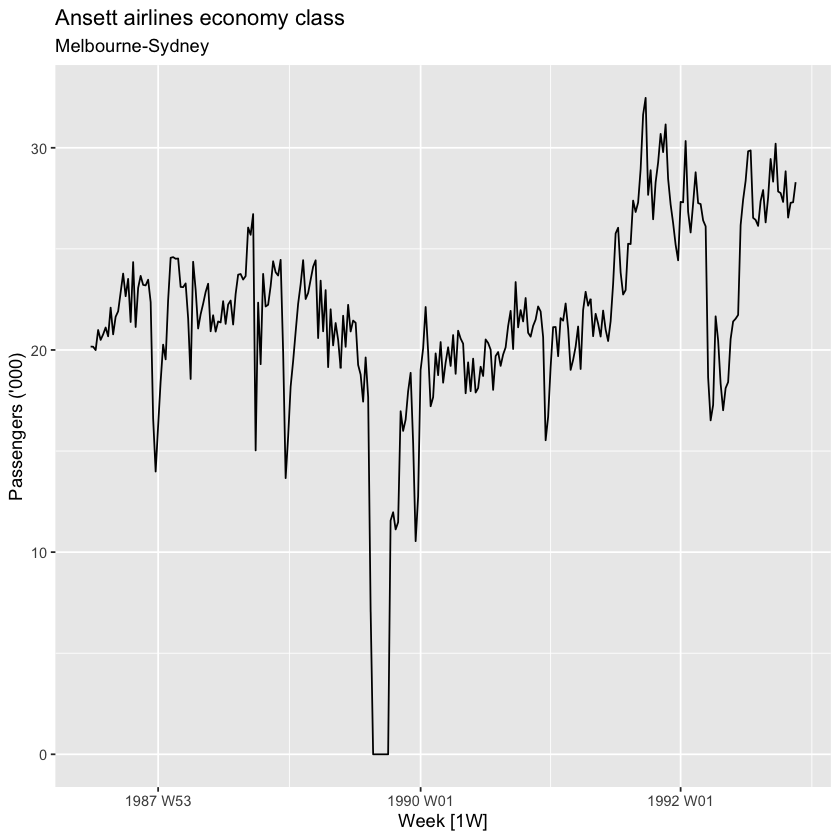

In [36]:
melsyd_economy <- ansett %>%
  filter(Airports == "MEL-SYD", Class == "Economy") %>%
  mutate(Passengers = Passengers/1000)
autoplot(melsyd_economy, Passengers) +
  labs(title = "Ansett airlines economy class",
       subtitle = "Melbourne-Sydney",
       y = "Passengers ('000)")

In [37]:
write.csv(melsyd_economy,"/Users/peterpaz/Dropbox/0_Forecasting/2_FPP/data/melsyd_economy.csv", row.names = FALSE)


In [38]:
melsyd_economy

Week     Airports Class   Passengers
1   1987 W26 MEL-SYD  Economy 20.167    
2   1987 W27 MEL-SYD  Economy 20.161    
3   1987 W28 MEL-SYD  Economy 19.993    
4   1987 W29 MEL-SYD  Economy 20.986    
5   1987 W30 MEL-SYD  Economy 20.497    
6   1987 W31 MEL-SYD  Economy 20.770    
7   1987 W32 MEL-SYD  Economy 21.111    
8   1987 W33 MEL-SYD  Economy 20.675    
9   1987 W34 MEL-SYD  Economy 22.092    
10  1987 W35 MEL-SYD  Economy 20.772    
11  1987 W36 MEL-SYD  Economy 21.642    
12  1987 W37 MEL-SYD  Economy 21.911    
13  1987 W39 MEL-SYD  Economy 23.777    
14  1987 W40 MEL-SYD  Economy 22.658    
15  1987 W41 MEL-SYD  Economy 23.515    
16  1987 W42 MEL-SYD  Economy 21.384    
17  1987 W43 MEL-SYD  Economy 24.344    
18  1987 W44 MEL-SYD  Economy 21.137    
19  1987 W45 MEL-SYD  Economy 23.069    
20  1987 W46 MEL-SYD  Economy 23.664    
21  1987 W47 MEL-SYD  Economy 23.219    
22  1987 W48 MEL-SYD  Economy 23.192    
23  1987 W49 MEL-SYD  Economy 23.475    
24  1987 W50 MEL-SYD  Economy 22.377    
25  1987 W51 MEL-SYD  Economy 16.606    
26  1987 W52 MEL-SYD  Economy 13.987    
27  1987 W53 MEL-SYD  Economy 16.251    
28  1988 W01 MEL-SYD  Economy 18.439    
29  1988 W02 MEL-SYD  Economy 20.262    
30  1988 W03 MEL-SYD  Economy 19.535    
⋮   ⋮        ⋮        ⋮       ⋮         
253 1992 W18 MEL-SYD  Economy 17.018    
254 1992 W19 MEL-SYD  Economy 18.111    
255 1992 W20 MEL-SYD  Economy 18.410    
256 1992 W21 MEL-SYD  Economy 20.541    
257 1992 W22 MEL-SYD  Economy 21.408    
258 1992 W23 MEL-SYD  Economy 21.545    
259 1992 W24 MEL-SYD  Economy 21.732    
260 1992 W25 MEL-SYD  Economy 26.173    
261 1992 W26 MEL-SYD  Economy 27.432    
262 1992 W27 MEL-SYD  Economy 28.362    
263 1992 W28 MEL-SYD  Economy 29.827    
264 1992 W29 MEL-SYD  Economy 29.870    
265 1992 W30 MEL-SYD  Economy 26.534    
266 1992 W31 MEL-SYD  Economy 26.434    
267 1992 W32 MEL-SYD  Economy 26.137    
268 1992 W33 MEL-SYD  Economy 27.365    
269 1992 W34 MEL-SYD  Economy 27.910    
270 1992 W35 MEL-SYD  Economy 26.311    
271 1992 W36 MEL-SYD  Economy 27.538    
272 1992 W37 MEL-SYD  Economy 29.445    
273 1992 W38 MEL-SYD  Economy 28.326    
274 1992 W39 MEL-SYD  Economy 30.203    
275 1992 W40 MEL-SYD  Economy 27.838    
276 1992 W41 MEL-SYD  Economy 27.760    
277 1992 W42 MEL-SYD  Economy 27.322    
278 1992 W43 MEL-SYD  Economy 28.837    
279 1992 W44 MEL-SYD  Economy 26.548    
280 1992 W45 MEL-SYD  Economy 27.279    
281 1992 W46 MEL-SYD  Economy 27.306    
282 1992 W47 MEL-SYD  Economy 28.299

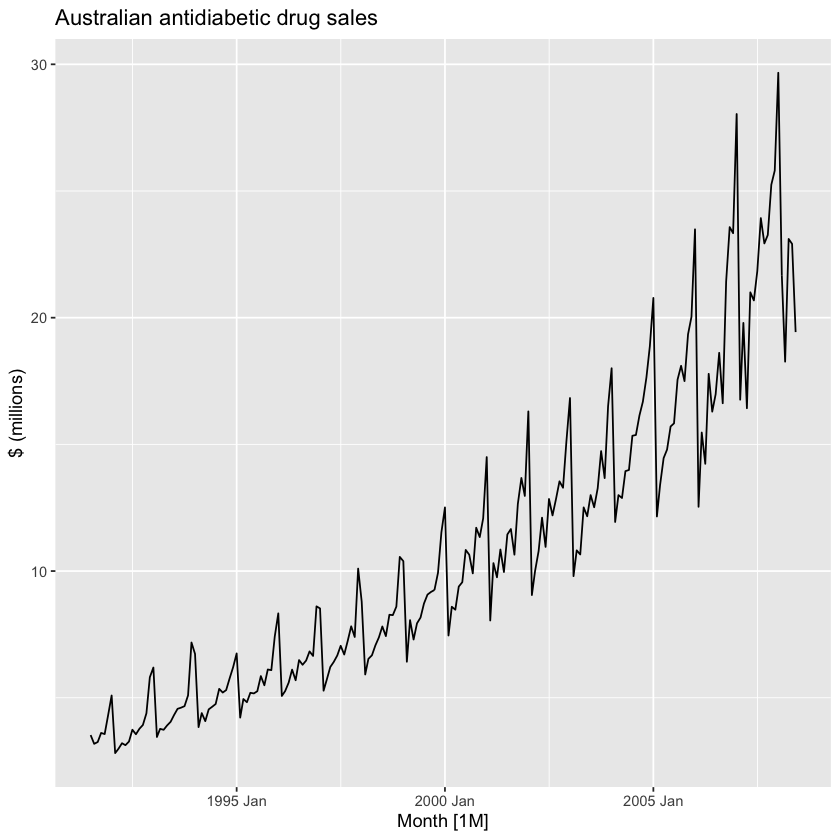

In [48]:
autoplot(a10, Cost) +
  labs(y = "$ (millions)",
       title = "Australian antidiabetic drug sales")

In [49]:
write.csv(a10,"/Users/peterpaz/Dropbox/0_Forecasting/2_FPP/data/a10.csv", row.names = FALSE)


In [50]:
a10

Month    TotalC   Cost    
1   1991 Jul 3526591  3.526591
2   1991 Aug 3180891  3.180891
3   1991 Sep 3252221  3.252221
4   1991 Oct 3611003  3.611003
5   1991 Nov 3565869  3.565869
6   1991 Dec 4306371  4.306371
7   1992 Jan 5088335  5.088335
8   1992 Feb 2814520  2.814520
9   1992 Mar 2985811  2.985811
10  1992 Apr 3204780  3.204780
11  1992 May 3127578  3.127578
12  1992 Jun 3270523  3.270523
13  1992 Jul 3737851  3.737851
14  1992 Aug 3558776  3.558776
15  1992 Sep 3777202  3.777202
16  1992 Oct 3924490  3.924490
17  1992 Nov 4386531  4.386531
18  1992 Dec 5810549  5.810549
19  1993 Jan 6192068  6.192068
20  1993 Feb 3450857  3.450857
21  1993 Mar 3772307  3.772307
22  1993 Apr 3734303  3.734303
23  1993 May 3905399  3.905399
24  1993 Jun 4049687  4.049687
25  1993 Jul 4315566  4.315566
26  1993 Aug 4562185  4.562185
27  1993 Sep 4608662  4.608662
28  1993 Oct 4667851  4.667851
29  1993 Nov 5093841  5.093841
30  1993 Dec 7179962  7.179962
⋮   ⋮        ⋮        ⋮       
175 2006 Jan 23486694 23.48669
176 2006 Feb 12536987 12.53699
177 2006 Mar 15467018 15.46702
178 2006 Apr 14233539 14.23354
179 2006 May 17783058 17.78306
180 2006 Jun 16291602 16.29160
181 2006 Jul 16980282 16.98028
182 2006 Aug 18612189 18.61219
183 2006 Sep 16623343 16.62334
184 2006 Oct 21430241 21.43024
185 2006 Nov 23575517 23.57552
186 2006 Dec 23334206 23.33421
187 2007 Jan 28038383 28.03838
188 2007 Feb 16763869 16.76387
189 2007 Mar 19792754 19.79275
190 2007 Apr 16427305 16.42731
191 2007 May 21000742 21.00074
192 2007 Jun 20681002 20.68100
193 2007 Jul 21834890 21.83489
194 2007 Aug 23930204 23.93020
195 2007 Sep 22930357 22.93036
196 2007 Oct 23263340 23.26334
197 2007 Nov 25250030 25.25003
198 2007 Dec 25806090 25.80609
199 2008 Jan 29665356 29.66536
200 2008 Feb 21654285 21.65429
201 2008 Mar 18264945 18.26495
202 2008 Apr 23107677 23.10768
203 2008 May 22912510 22.91251
204 2008 Jun 19431740 19.43174

## Seasonal Plots

In [56]:
a10[1:5,]

Month    TotalC  Cost    
1 1991 Jul 3526591 3.526591
2 1991 Aug 3180891 3.180891
3 1991 Sep 3252221 3.252221
4 1991 Oct 3611003 3.611003
5 1991 Nov 3565869 3.565869

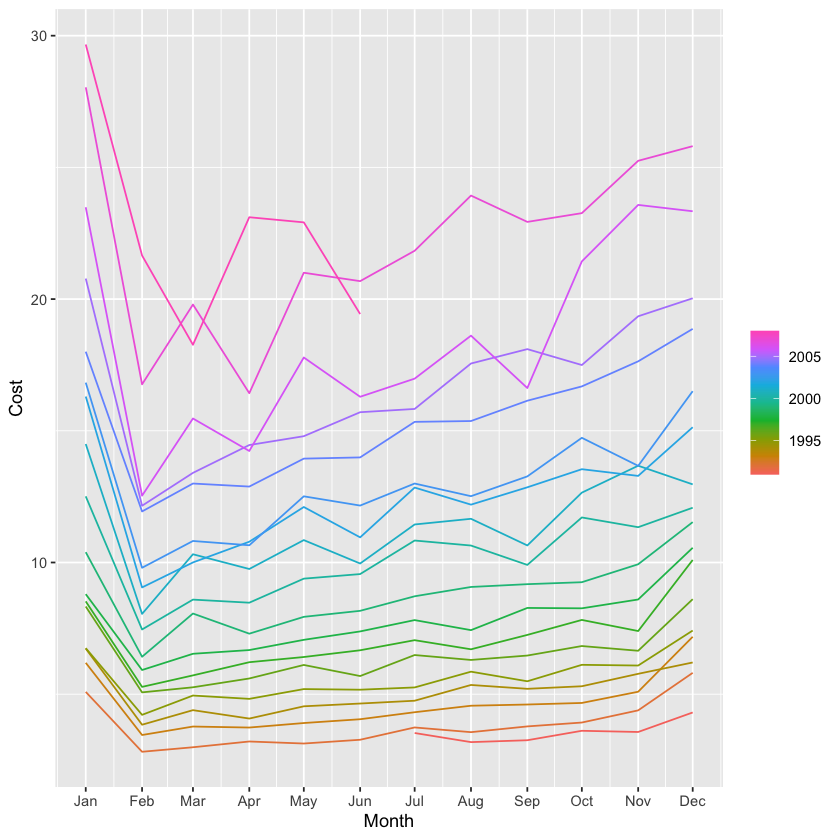

In [67]:
a10 %>%
  gg_season(Cost) 

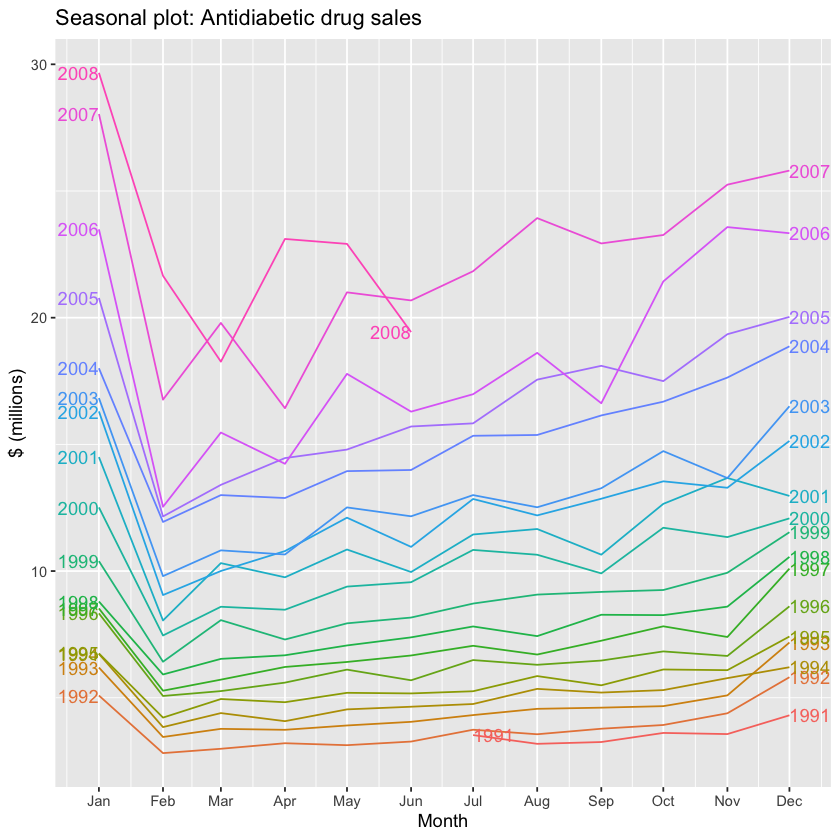

In [70]:
a10 %>%
  gg_season(Cost, labels = "both") +
  labs(y = "$ (millions)",
       title = "Seasonal plot: Antidiabetic drug sales") +
  expand_limits(x = ymd(c("1972-12-28", "1973-12-04")))

In [80]:
vic_elec[1:10,]

Time                Demand   Temperature Date       Holiday
1  2012-01-01 00:00:00 4382.825 21.40       2012-01-01 TRUE   
2  2012-01-01 00:30:00 4263.366 21.05       2012-01-01 TRUE   
3  2012-01-01 01:00:00 4048.966 20.70       2012-01-01 TRUE   
4  2012-01-01 01:30:00 3877.563 20.55       2012-01-01 TRUE   
5  2012-01-01 02:00:00 4036.230 20.40       2012-01-01 TRUE   
6  2012-01-01 02:30:00 3865.597 20.25       2012-01-01 TRUE   
7  2012-01-01 03:00:00 3694.098 20.10       2012-01-01 TRUE   
8  2012-01-01 03:30:00 3561.624 19.60       2012-01-01 TRUE   
9  2012-01-01 04:00:00 3433.035 19.10       2012-01-01 TRUE   
10 2012-01-01 04:30:00 3359.468 18.95       2012-01-01 TRUE

In [81]:
write.csv(vic_elec,"/Users/peterpaz/Dropbox/0_Forecasting/2_FPP/data/vic_elec.csv", row.names = FALSE)


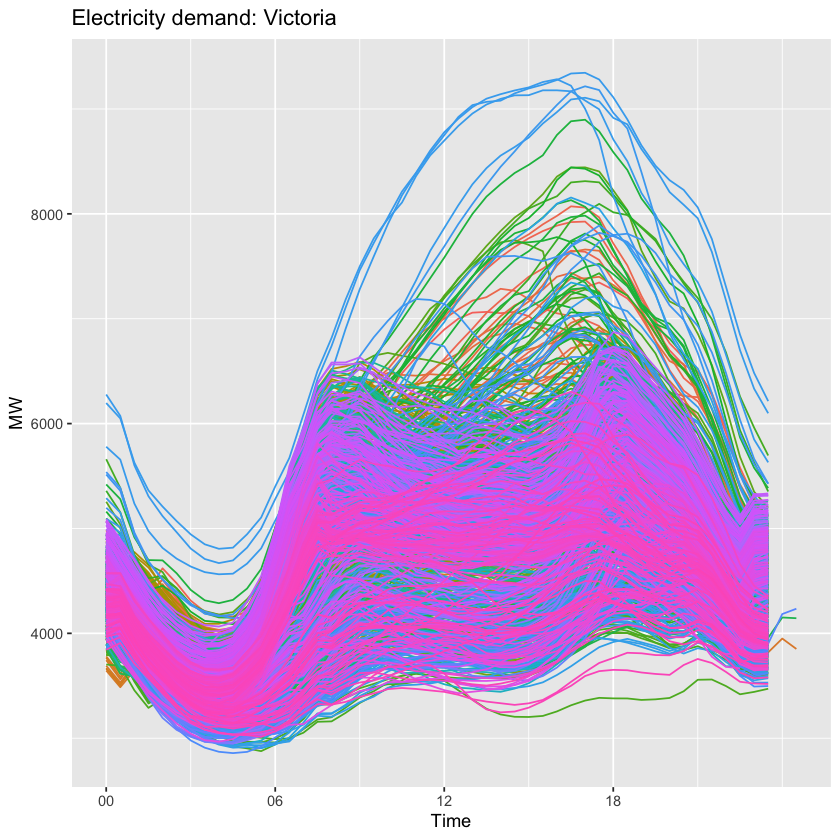

In [71]:
vic_elec %>% gg_season(Demand, period = "day") +
  theme(legend.position = "none") +
  labs(y="MW", title="Electricity demand: Victoria")

In [79]:
help(gg_season)

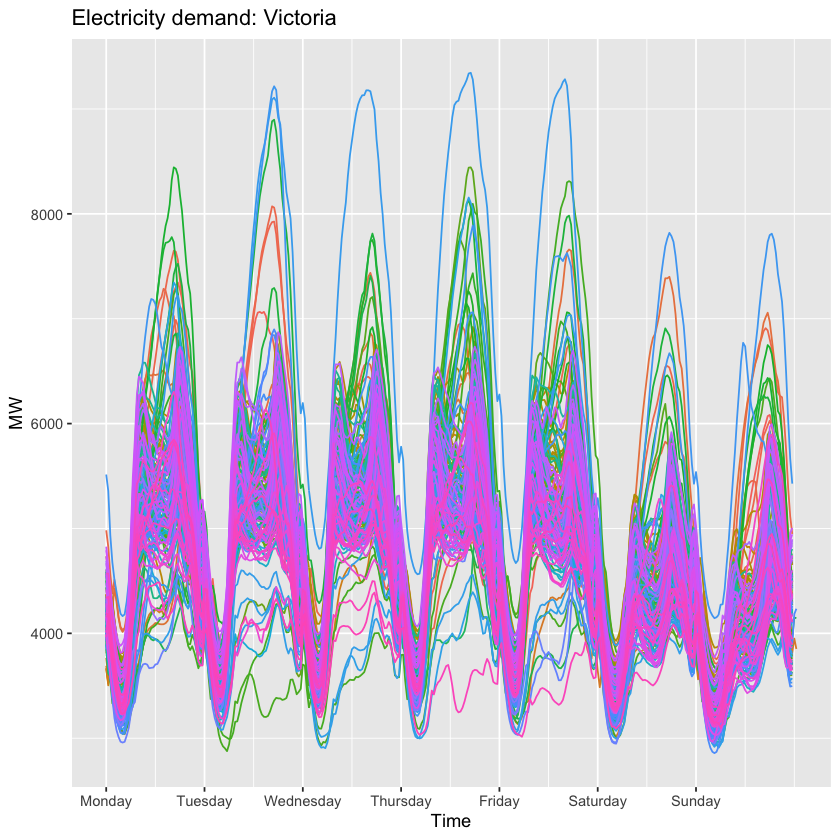

In [74]:
vic_elec %>% gg_season(Demand, period = "week") +
  theme(legend.position = "none") +
  labs(y="MW", title="Electricity demand: Victoria")

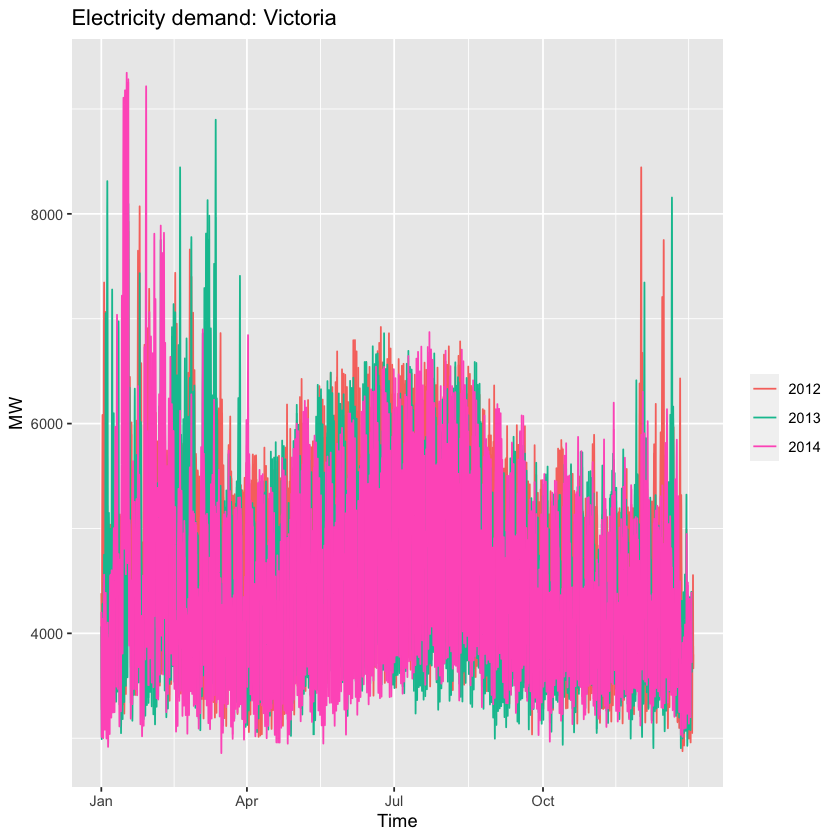

In [75]:
vic_elec %>% gg_season(Demand, period = "year") +
  labs(y="MW", title="Electricity demand: Victoria")

## Seasonal Subseries plot

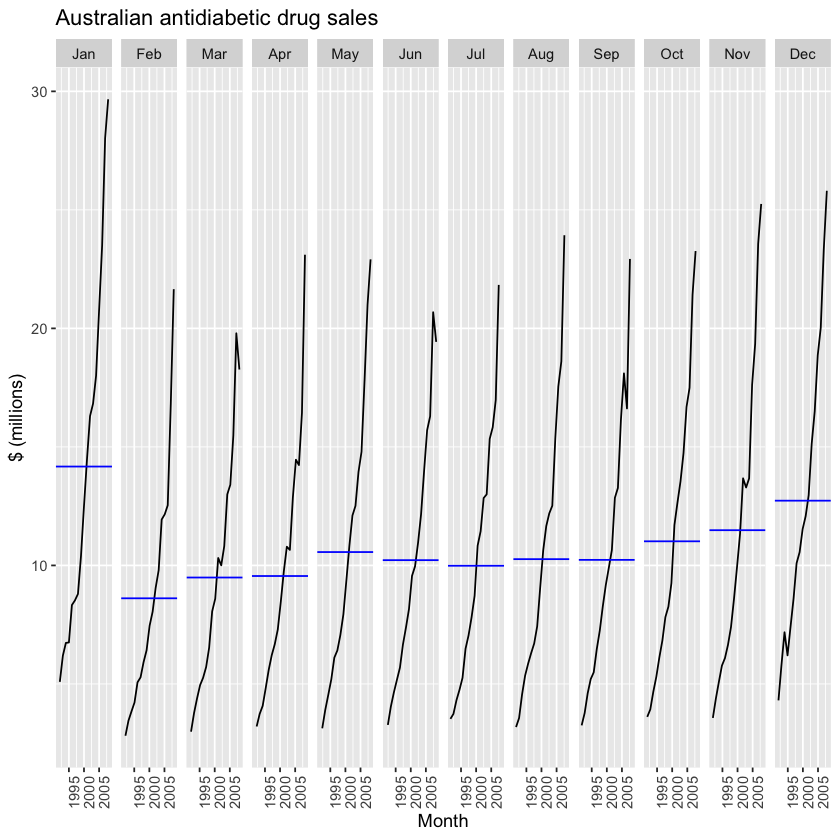

In [84]:
a10 %>%
  gg_subseries(Cost) +
  labs(
    y = "$ (millions)",
    title = "Australian antidiabetic drug sales"
      )

Blue line is the mean for each month. Useful to identify changes within particular season.

# Australian holiday tourism

In [92]:
tourism[1:10,]

Quarter Region   State           Purpose  Trips   
1  1998 Q1 Adelaide South Australia Business 135.0777
2  1998 Q2 Adelaide South Australia Business 109.9873
3  1998 Q3 Adelaide South Australia Business 166.0347
4  1998 Q4 Adelaide South Australia Business 127.1605
5  1999 Q1 Adelaide South Australia Business 137.4485
6  1999 Q2 Adelaide South Australia Business 199.9126
7  1999 Q3 Adelaide South Australia Business 169.3551
8  1999 Q4 Adelaide South Australia Business 134.3579
9  2000 Q1 Adelaide South Australia Business 154.0344
10 2000 Q2 Adelaide South Australia Business 168.7764

From tourism data, we filter the variable Purpose equal to holiday, then we group by state,
then we sum the variable trips, and we get the total visitors night spent
on holiday by state for each quarters.  We ignore Regions. 

FInally, we define that variable as "holidays" See below:

In [98]:
holidays <- tourism %>%
  filter(Purpose == "Holiday") %>%
  group_by(State) %>%
  summarise(Trips = sum(Trips))
holidays[1:10,]

State Quarter Trips   
1  ACT   1998 Q1 196.2186
2  ACT   1998 Q2 126.7706
3  ACT   1998 Q3 110.6796
4  ACT   1998 Q4 170.4722
5  ACT   1999 Q1 107.7792
6  ACT   1999 Q2 124.6442
7  ACT   1999 Q3 177.9469
8  ACT   1999 Q4 217.6562
9  ACT   2000 Q1 158.4146
10 ACT   2000 Q2 154.8065

autoplot is a generic function to visualize various data object,
it tries to give better default graphics and customized choices for each data type, 
quick and convenient to explore your genomic data compare to low level ggplot method, 
it is much simpler and easy to produce fairly complicate graphics, though you may ..

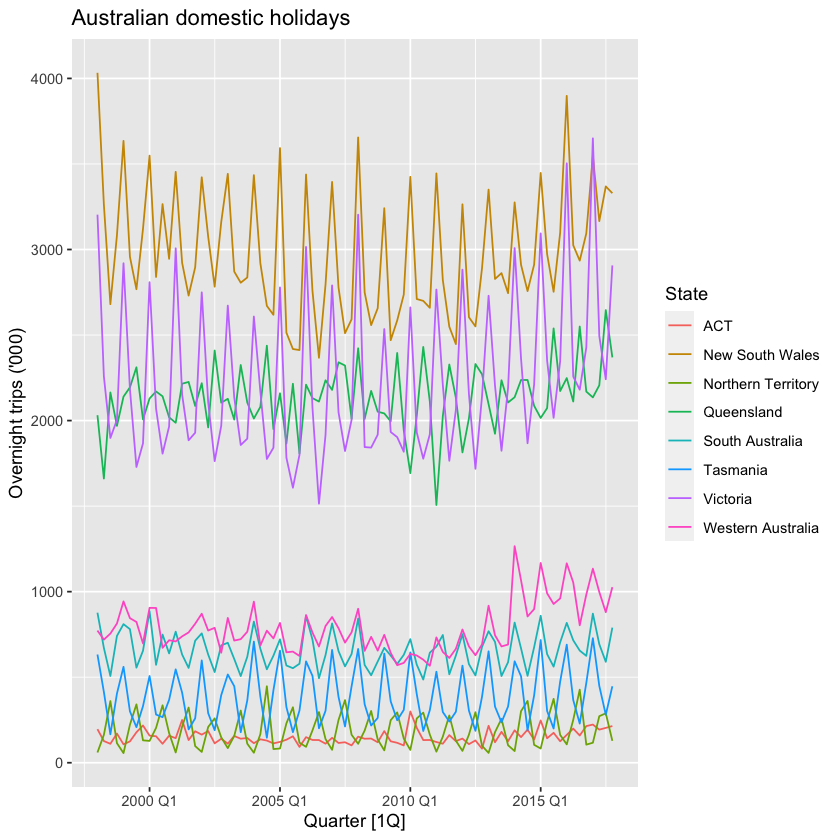

In [100]:
autoplot(holidays, Trips) +
  labs(y = "Overnight trips ('000)",
       title = "Australian domestic holidays")

Time plots of Australian domestic holidays by state.

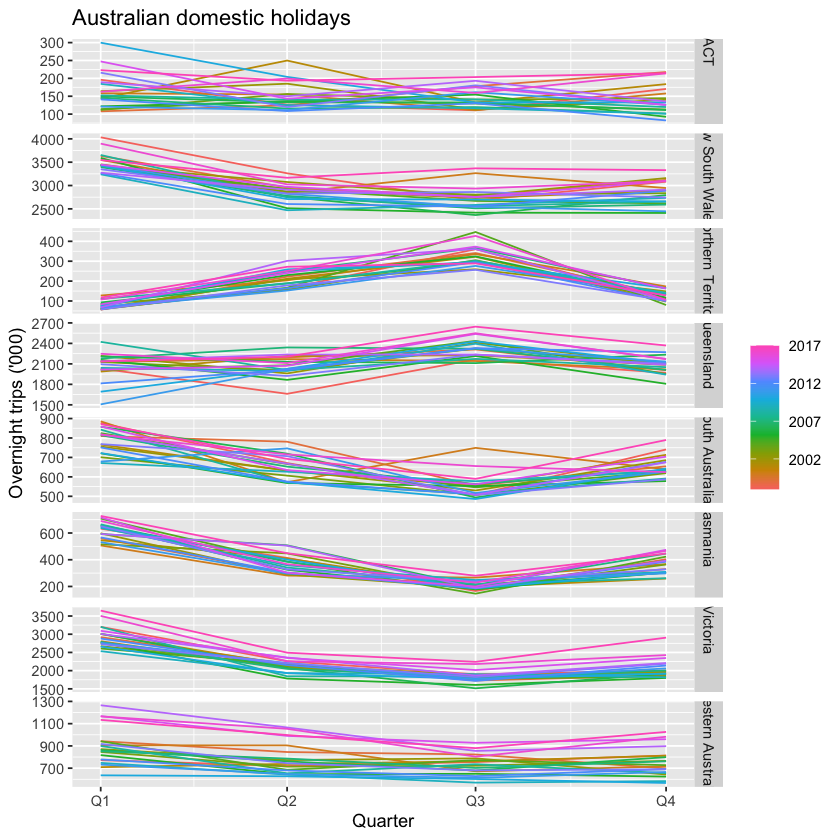

In [103]:
gg_season(holidays, Trips) +
  labs(y = "Overnight trips ('000)",
       title = "Australian domestic holidays")

Season plots of Australian domestic holidays by state.

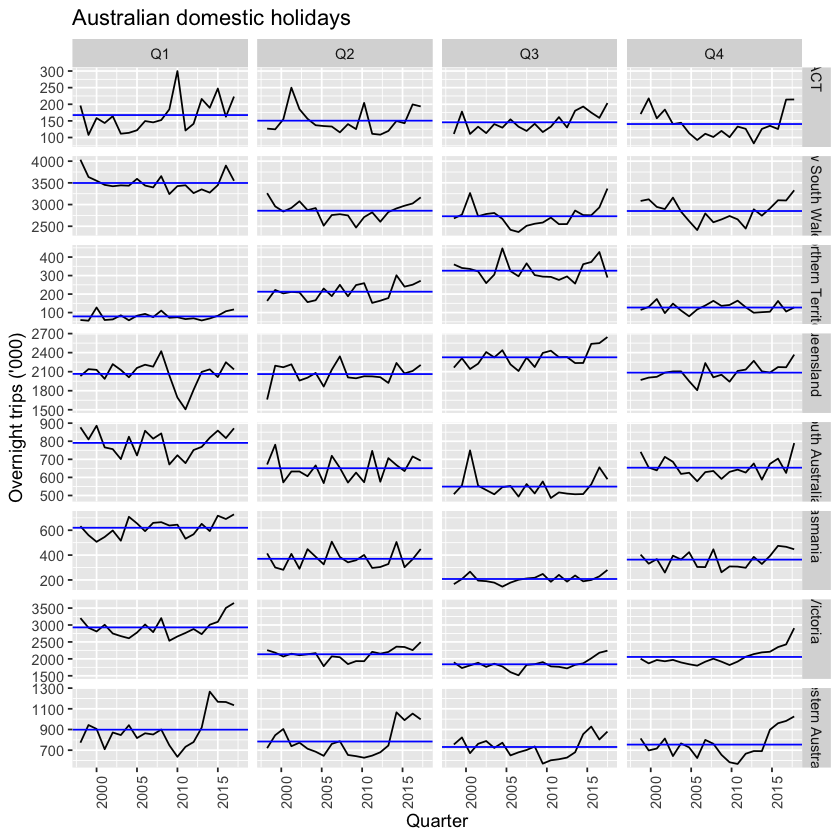

In [88]:
holidays %>%
  gg_subseries(Trips) +
  labs(y = "Overnight trips ('000)",
       title = "Australian domestic holidays")

 Subseries plots of Australian domestic holidays by state.

# Scatter plots

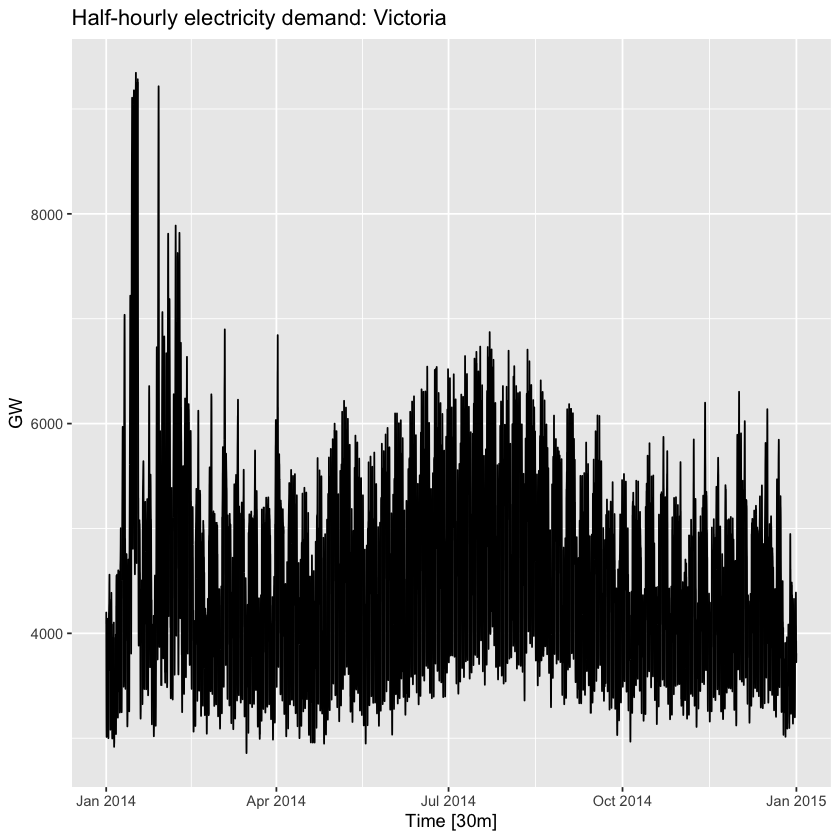

In [108]:
vic_elec %>%
  filter(year(Time) == 2014) %>%
  autoplot(Demand) +
  labs(y = "GW",
       title = "Half-hourly electricity demand: Victoria")

Half hourly electricity demand in Victoria, Australia, for 2014.

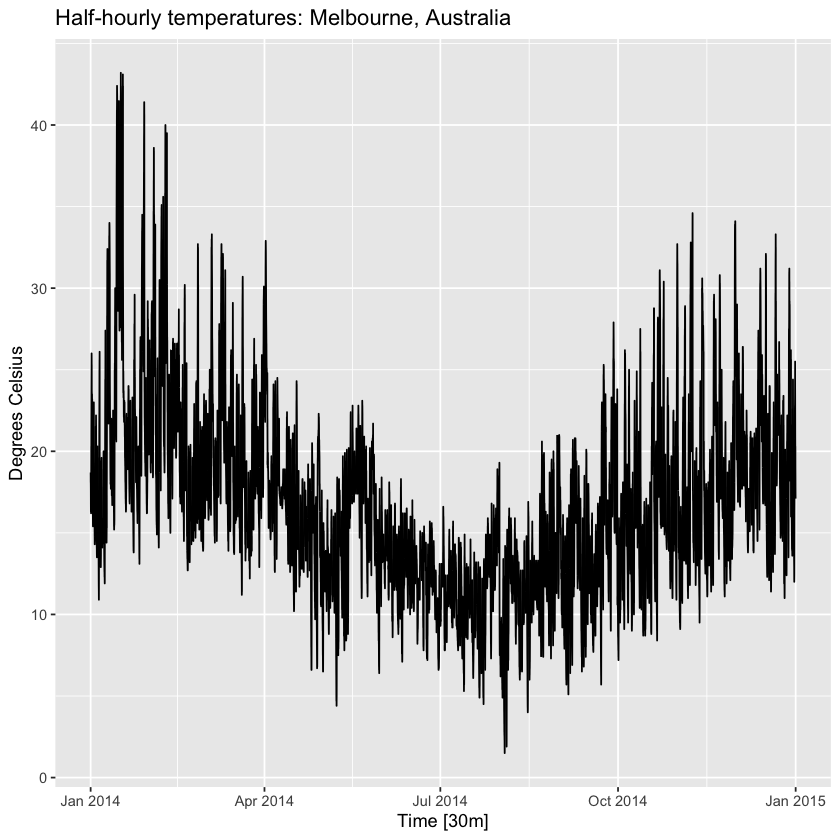

In [109]:
vic_elec %>%
  filter(year(Time) == 2014) %>%
  autoplot(Temperature) +
  labs(
    y = "Degrees Celsius",
    title = "Half-hourly temperatures: Melbourne, Australia"
  )

Half hourly temperature in Melbourne, Australia, for 2014.

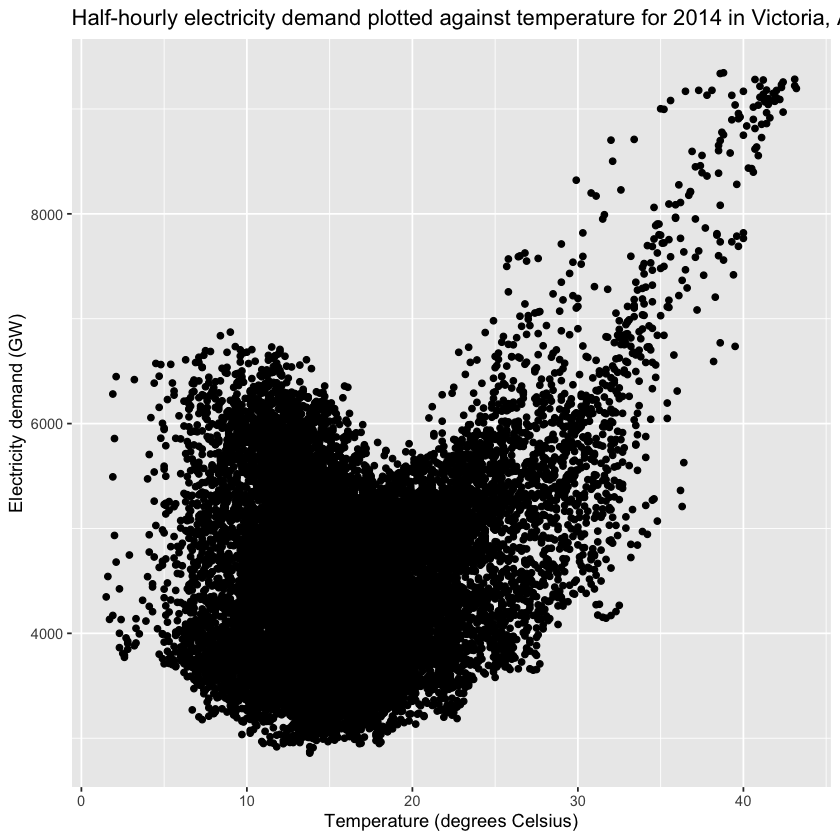

In [112]:
vic_elec %>%
  filter(year(Time) == 2014) %>%
  ggplot(aes(x = Temperature, y = Demand)) +
  geom_point() +
  labs(x = "Temperature (degrees Celsius)",
       y = "Electricity demand (GW)",
      title="Half-hourly electricity demand plotted against temperature for 2014 in Victoria, Australia.")

## Scatterplot matrices


In [114]:
visitors <- tourism %>%
  group_by(State) %>%
  summarise(Trips = sum(Trips))

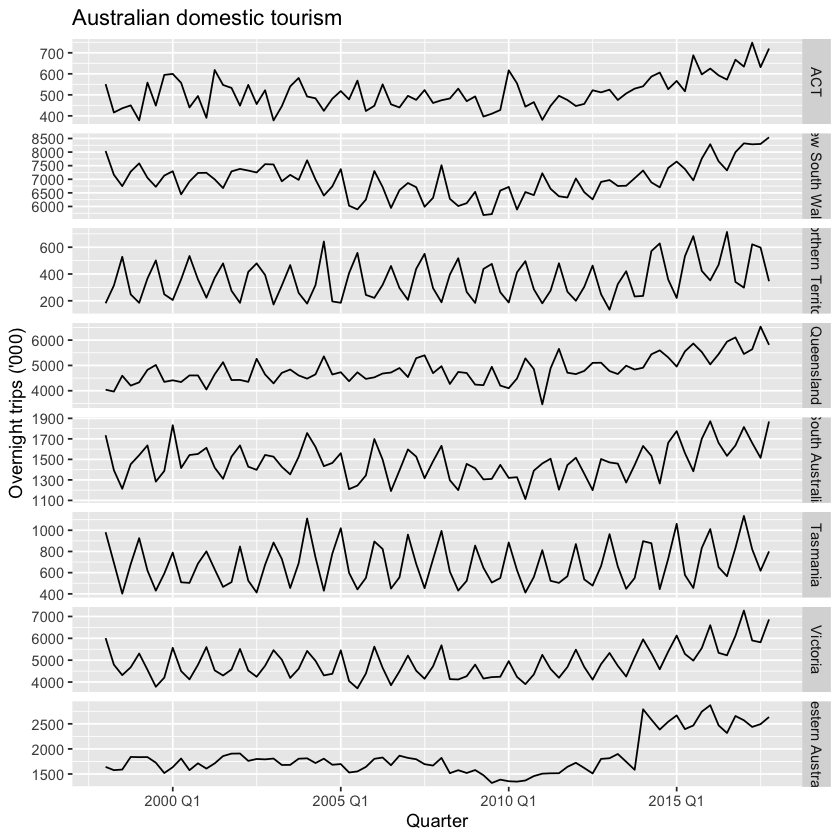

In [115]:
visitors %>%
  ggplot(aes(x = Quarter, y = Trips)) +
  geom_line() +
  facet_grid(vars(State), scales = "free_y") +
  labs(title = "Australian domestic tourism",
       y= "Overnight trips ('000)")

In [122]:
#install.packages("GGally")

To see the relationships between these eight time series,
we can plot each time series against the others. 
These plots can be arranged in a scatterplot matrix

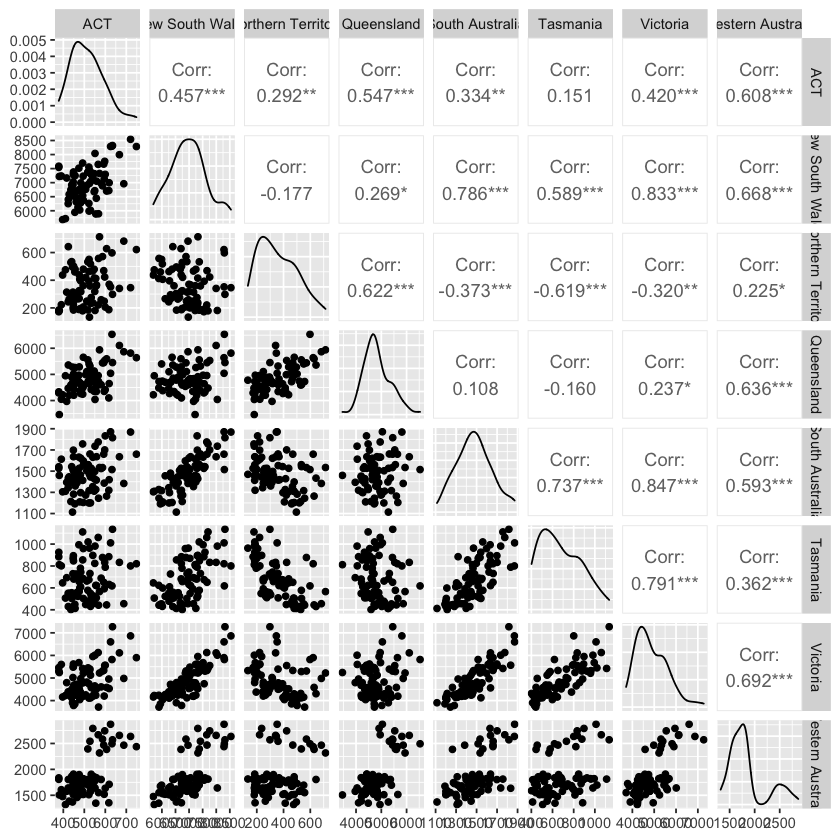

In [121]:
visitors %>%
  pivot_wider(values_from=Trips, names_from=State) %>%
  GGally::ggpairs(columns = 2:9)

A scatterplot matrix of the quarterly visitor nights in the states and territories of Australia.

## Lag Plots

In [128]:
aus_production[1:5,]

Quarter Beer Tobacco Bricks Cement Electricity Gas
1 1956 Q1 284  5225    189    465    3923        5  
2 1956 Q2 213  5178    204    532    4436        6  
3 1956 Q3 227  5297    208    561    4806        7  
4 1956 Q4 308  5681    197    570    4418        6  
5 1957 Q1 262  5577    187    529    4339        5

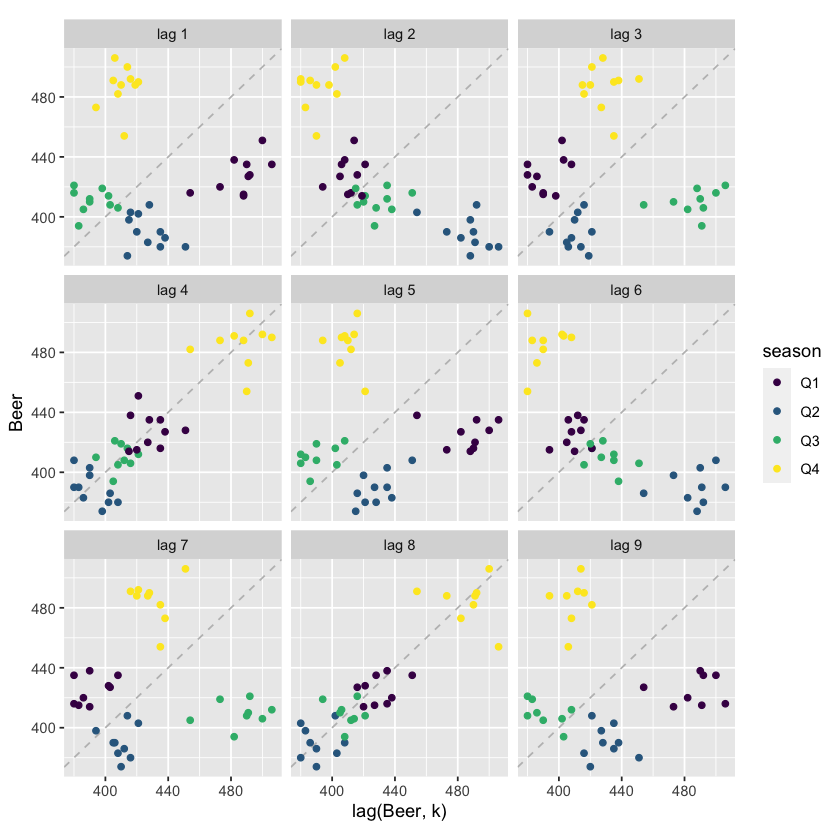

In [123]:
recent_production <- aus_production %>%
  filter(year(Quarter) >= 2000)
recent_production %>%
  gg_lag(Beer, geom = "point") +
  labs(x = "lag(Beer, k)")

Scatterplots of quarterly Australian beer production. Where the horizontal axis shows lagged values of the time series. Here the colours indicate the quarter of the variable on the vertical axis. The relationship is strongly positive at lags 4 and 8, reflecting the strong seasonality in the data

# Autocorrelation

In [131]:
recent_production[1:8,]

Quarter Beer Tobacco Bricks Cement Electricity Gas
1 2000 Q1 421  5169    416    1835   49320       164
2 2000 Q2 402  4860    447    2070   50670       199
3 2000 Q3 414  5185    421    1898   52623       213
4 2000 Q4 500  4763    379    1652   49350       173
5 2001 Q1 451  4217    304    1554   51658       177
6 2001 Q2 380  4959    337    1717   51103       205
7 2001 Q3 416  5196    385    1679   52226       218
8 2001 Q4 492  4522    381    1836   50778       185

In [129]:
recent_production %>% ACF(Beer, lag_max = 9)


lag acf         
1 1Q  -0.052981076
2 2Q  -0.758175440
3 3Q  -0.026233757
4 4Q   0.802204530
5 5Q  -0.077471204
6 6Q  -0.657451271
7 7Q   0.001194922
8 8Q   0.707254078
9 9Q  -0.088756255

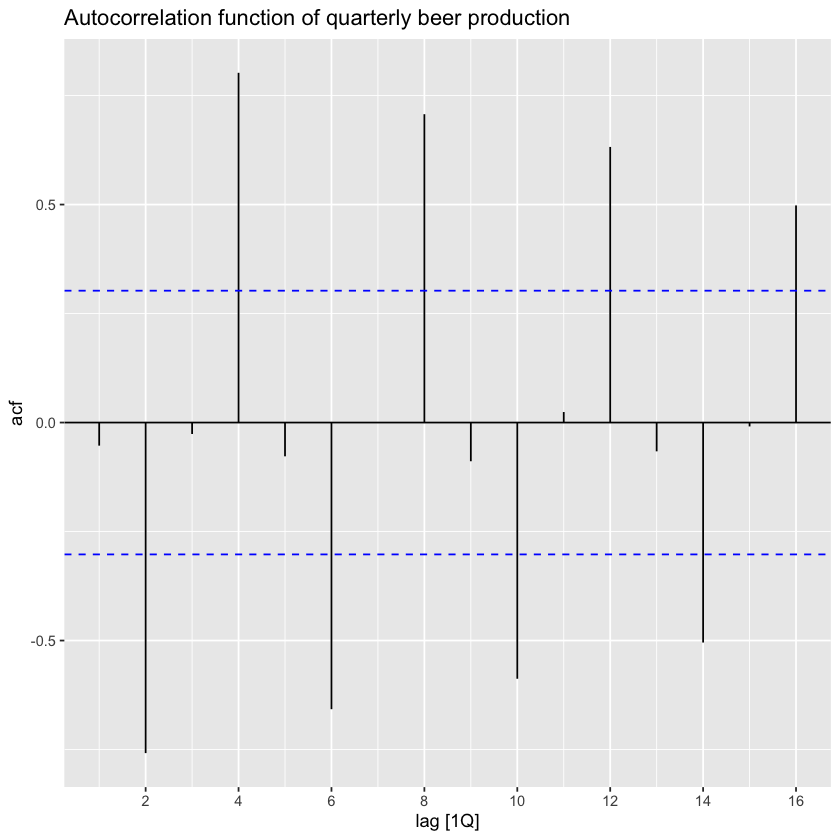

In [133]:
recent_production %>%
  ACF(Beer) %>%
  autoplot() + 
  labs(title="Autocorrelation function of quarterly beer production")

- $r_4$ is higher than for the other lags. This is due to the seasonal pattern in the data: the peaks tend to be four quarters apart and the troughs tend to be four quarters apart.
- $r_2$ is more negative than for the other lags because troughs tend to be two quarters behind peaks.
- The dashed blue lines indicate whether the correlations are significantly different from zero.

# Trend and seasonality in ACF plots

In [136]:
a10[1:8,]

Month    TotalC  Cost    
1 1991 Jul 3526591 3.526591
2 1991 Aug 3180891 3.180891
3 1991 Sep 3252221 3.252221
4 1991 Oct 3611003 3.611003
5 1991 Nov 3565869 3.565869
6 1991 Dec 4306371 4.306371
7 1992 Jan 5088335 5.088335
8 1992 Feb 2814520 2.814520

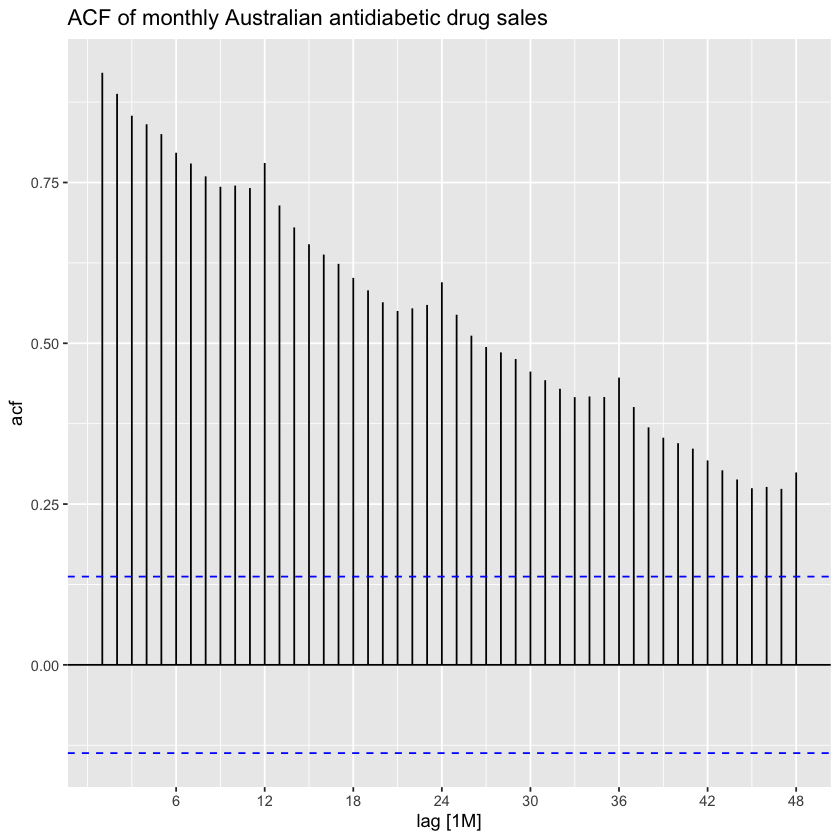

In [135]:
a10 %>%
  ACF(Cost, lag_max = 48) %>%
  autoplot() +
  labs(title="ACF of monthly Australian antidiabetic drug sales")

- OBSERVATION: When data have a trend, the autocorrelations for small lags tend to be large and positive because observations nearby in time are also nearby in value. So the ACF of a trended time series tends to have positive values that slowly decrease as the lags increase.
- When data are seasonal, the autocorrelations will be larger for the seasonal lags (at multiples of the seasonal period) than for other lags.
- When data are both trended and seasonal, you see a combination of these effects

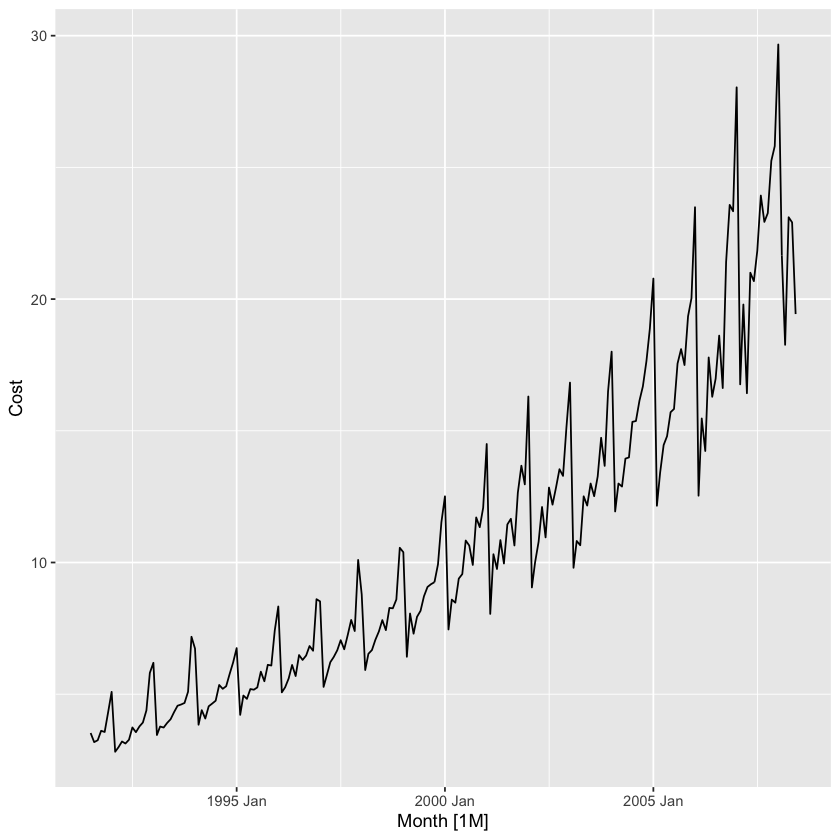

In [137]:
a10 %>%
  autoplot(Cost)

# White Noise

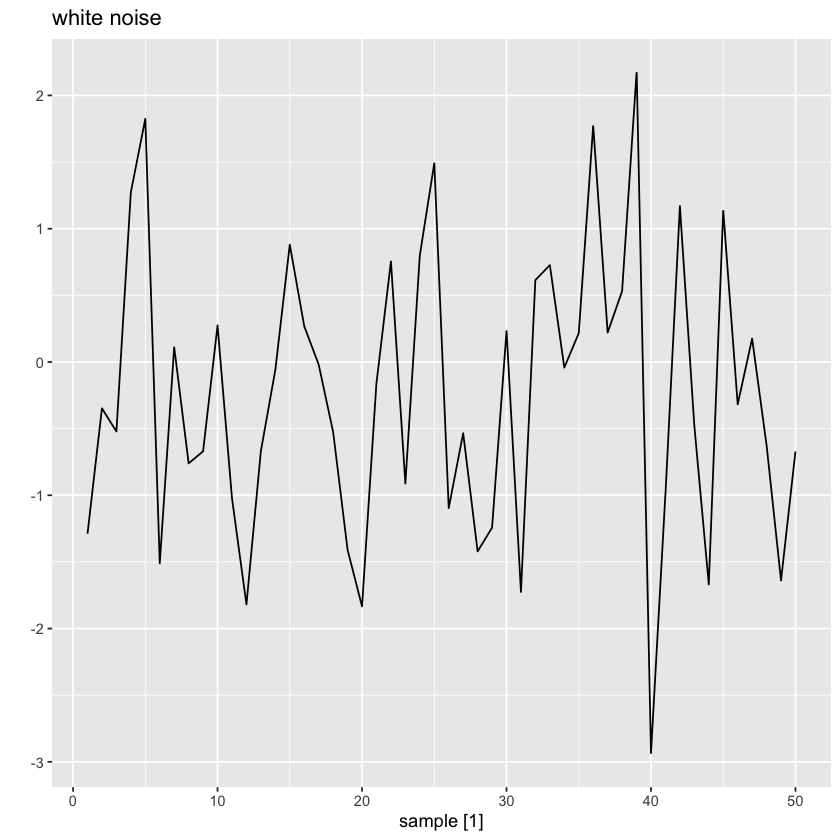

In [138]:
set.seed(30)
y<- tsibble(sample=1:50, wn=rnorm(50), index=sample)
y%>% autoplot(wn)+labs(title="white noise", y="")

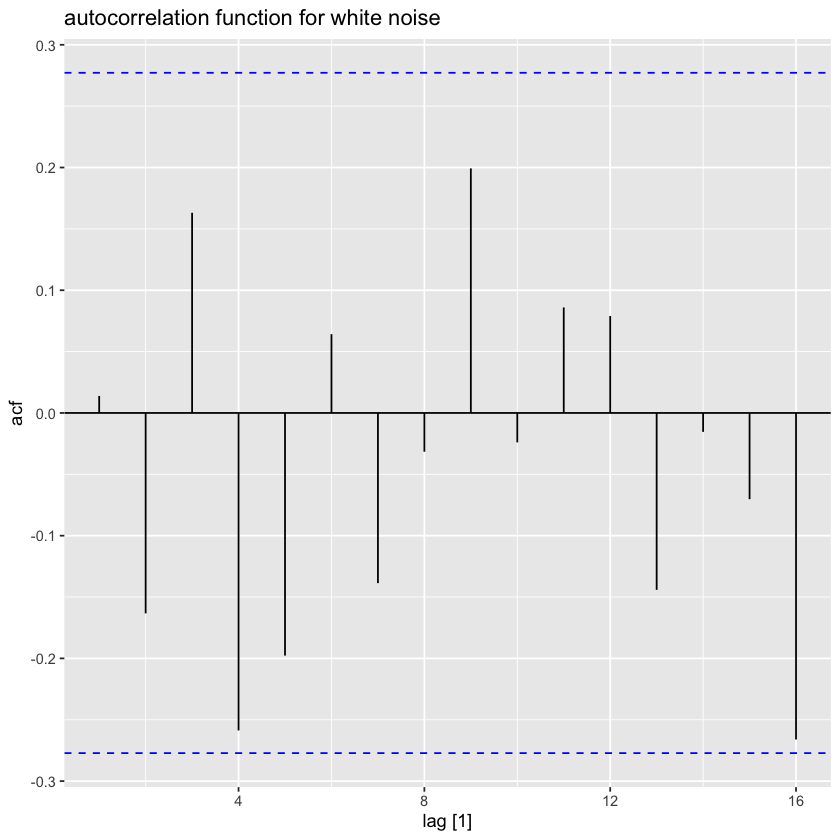

In [139]:
y %>%
  ACF(wn) %>%
  autoplot()+labs(title="autocorrelation function for white noise")

- For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation